# ANOVA – Super Simple Introduction

- [Tutorial](https://www.spss-tutorials.com/anova-what-is-it/)

---

# Find
- [x] mean of each group
- [x] grand mean
- [x] variance of each group
- [ ] grand variance
- [x] plot mean of each group

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

1. Organize Data

In [2]:
def load_data(dataset):

    original_data = pd.read_csv(dataset)
    copy_of_data = original_data.copy()
    return copy_of_data

In [3]:
path_to_dataset = "/Users/brinkley97/Documents/development/lab-information_sciences_institute/spss_dataset/One-Way ANOVA Calculation.csv"
data = load_data(path_to_dataset)

In [4]:
data

,Group,Score,Group Mean,Mean,GM - M,Squares Between,Score - GM,Squares Within,Count Groups,Count Observations
0,1,90,99.2,101.7,-2.5,6.25,-9.2,84.64,3,30
1,1,87,99.2,101.7,-2.5,6.25,-12.2,148.84,3,30
2,1,93,99.2,101.7,-2.5,6.25,-6.2,38.44,3,30
3,1,115,99.2,101.7,-2.5,6.25,15.8,249.64,3,30
4,1,97,99.2,101.7,-2.5,6.25,-2.2,4.84,3,30
5,1,85,99.2,101.7,-2.5,6.25,-14.2,201.64,3,30
6,1,102,99.2,101.7,-2.5,6.25,2.8,7.84,3,30
7,1,110,99.2,101.7,-2.5,6.25,10.8,116.64,3,30
8,1,111,99.2,101.7,-2.5,6.25,11.8,139.24,3,30
9,1,102,99.2,101.7,-2.5,6.25,2.8,7.84,3,30


## Organizing Data

- [x] Drop unneeded columns
- [x] Create new columns with groups

In [5]:
drop_columns = ["Group Mean", "Mean", "GM - M", "Squares Between", "Score - GM", "Squares Within", "Count Groups", "Count Observations"]
group_and_scores_only = data.drop(columns=drop_columns)

In [6]:
group_and_scores_only

,Group,Score
0,1,90
1,1,87
2,1,93
3,1,115
4,1,97
5,1,85
6,1,102
7,1,110
8,1,111
9,1,102


## Remove Group Column and Add Various Groups As Separate Columns

In [7]:
def value_to_col(data, new_cols):
    
    '''
    Get unique groups
    '''
    
    unique_values = data["Group"].value_counts()
    # print("unique_values : ", unique_values)
    
    unique_values_keys = unique_values.keys()
    # print("\nunique_values_keys : ", unique_values_keys)
    
    '''
    Drop "Group" column
    '''
    
    update_group_col = data.pop("Group")
    # print(remove_group_col)
    
    '''
    Set new cols
    '''
    new_col_1 = new_cols[2]
    new_col_2 = new_cols[1]
    new_col_3 = new_cols[0]
    
    '''
    Reconstruct with new cols
    '''
    
    data[new_col_1] = (update_group_col == unique_values_keys[0]) * data["Score"]
    data[new_col_2] = (update_group_col == unique_values_keys[1]) * data["Score"]
    data[new_col_3] = (update_group_col == unique_values_keys[2]) * data["Score"]
    
    # print(data)
    
    '''
    Replace 0 and 1
    '''
    data.loc[10:, ["1"]] = np.nan
    data.loc[0:9, ["2"]] = np.nan
    data.loc[20:, ["2"]] = np.nan
    data.loc[0:19, ["3"]] = np.nan
    
    '''
    Truncate specific columns
    '''
    new_index = range(1, 11)
    truncate_col_1 = data["1"].truncate(before=0, after=9)
    reformat_col_1 = np.array(truncate_col_1)
    update_truncated_col_1 = pd.DataFrame(reformat_col_1, columns=["1"], index=new_index)
    # print(update_truncated_col_1)
    
    truncate_col_2 = data["2"].truncate(before=10, after=19)
    reformat_col_2 = np.array(truncate_col_2)
    update_truncated_col_2 = pd.DataFrame(reformat_col_2, columns=["2"], index=new_index)
    # print("\n", update_truncated_col_2)

    truncate_col_3 = data["3"].truncate(before=20, after=29)
    reformat_col_3 = np.array(truncate_col_3)
    update_truncated_col_3 = pd.DataFrame(reformat_col_3, columns=["3"], index=new_index)
    # print("\n", update_truncated_col_3)
    
    '''
    Set index
    '''
    # truncate_col_1.set_index(
    
    formatted_data = pd.concat([update_truncated_col_1, update_truncated_col_2, update_truncated_col_3], axis=1)
  
    return formatted_data

In [8]:
groups = ["1", "2", "3"]

In [9]:
data = value_to_col(group_and_scores_only, groups)

In [10]:
data

,1,2,3
1,90.0,135.0,93.0
2,87.0,125.0,101.0
3,93.0,107.0,74.0
4,115.0,96.0,87.0
5,97.0,114.0,76.0
6,85.0,125.0,87.0
7,102.0,94.0,98.0
8,110.0,123.0,108.0
9,111.0,111.0,113.0
10,102.0,96.0,96.0


In [11]:
data.shape[0], data.shape[1]

(10, 3)

In [82]:
mean = []
grand_mean = []
variance = []
grand_variance = []
sum_of_squares = []
degrees_of_freedom = []

def calc_statistical_data(data):
    
    '''
    Descriptives Data
        Mean
        Grand mean
        Variance
        Grand variance
    '''
    mean.append(data.mean())
    grand_mean.append(np.mean(mean))
    variance.append(round(data.var(), 1))
    # grand_variance.append(round((np.sum(variance)/3), 1))
    
    '''
    Sum of squares between groups
    '''
    gm_mean_diff = np.subtract(grand_mean, mean)
    gm_mean_diff_per_group_squared = np.square(gm_mean_diff)
    sum_of_squares_between = round(np.sum(np.multiply(data.shape[0], gm_mean_diff_per_group_squared)), 3)
    sum_of_squares.append(sum_of_squares_between)
    

    '''
    Sum of squares within groups
    '''
    datapoint_mean_diff = np.subtract(data, mean)
    datapoint_mean_diff_per_group_squared = np.square(datapoint_mean_diff)
    sum_of_squares_within = round(np.sum(np.sum(datapoint_mean_diff_per_group_squared)), 3)
    sum_of_squares.append(sum_of_squares_within)
    
    
    '''
    Total sum of squares
    '''
    sum_of_squares_total = round((sum_of_squares_between + sum_of_squares_within), 3)
    sum_of_squares.append(sum_of_squares_total)
    
    '''
    Degrees of freedom
    '''
    degrees_of_freedom_between = data.shape[1] - 1
    degrees_of_freedom.append(degrees_of_freedom_between)
    degrees_of_freedom_within = (data.shape[0] * data.shape[1]) - data.shape[1]
    degrees_of_freedom.append(degrees_of_freedom_within)
    degrees_of_freedom_total = degrees_of_freedom_between + degrees_of_freedom_within
    degrees_of_freedom.append(degrees_of_freedom_total)
    
    return mean, grand_mean, variance, grand_variance, sum_of_squares, degrees_of_freedom

In [83]:
statistical_data = calc_statistical_data(data)

In [84]:
statistical_data

([1     99.2
  2    112.6
  3     93.3
  dtype: float64],
 [101.7],
 [1    111.1
  2    205.6
  3    160.5
  dtype: float64],
 [],
 [1956.2, 4294.1, 6250.3],
 [2, 27, 29])

In [35]:
statistical_data[0]

[1     99.2
 2    112.6
 3     93.3
 dtype: float64]

In [36]:
mean_of_data = np.array(statistical_data[0]).T

In [37]:
mean = pd.DataFrame(mean_of_data, columns=["Mean"], index=["School 1", "School 2", "School 3"])

In [38]:
mean

,Mean
School 1,99.2
School 2,112.6
School 3,93.3


## pandas Plot vs matplotlib Plot

- mean.plot.barh() works well but can't add a title to the plot() function
- mean.plot(title="Mean IQ Scores by School (n = 10 per School").barh() throws an error so use matplotlib to add a title

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

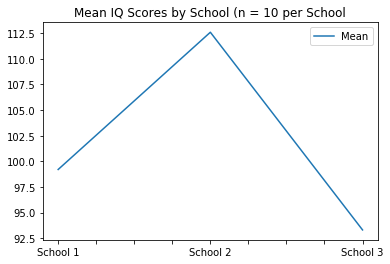

In [39]:
mean.plot(title="Mean IQ Scores by School (n = 10 per School").barh(color="Red")

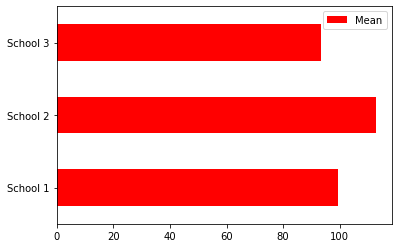

In [40]:
mean.plot.barh(color="Red")

TypeError: float() argument must be a string or a number, not 'NoneType'

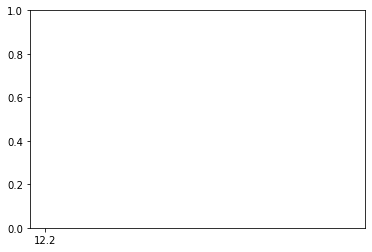

In [41]:
plot_mean = plt.barh(mean, ["12.2"])

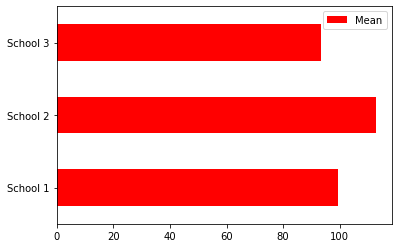

In [42]:
mean.plot.barh(color="Red")